**1. import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2. load the dataset**

In [2]:
df = pd.read_csv("/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**3. basic information**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [5]:
# checking out the no. of rows and columns in the dataset
df.shape

(1000, 8)

In [6]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**4. Preprocessing**

In [7]:
# check the null values
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [8]:
# Handling Missing Values
# replace "none" with np.nan
df.replace("none", np.nan, inplace=True)

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,NaN,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,NaN,90,95,93
3,male,group A,associate's degree,free/reduced,NaN,47,57,44
4,male,group C,some college,standard,NaN,76,78,75


In [10]:
# now checking the missing values
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,642
math score,0
reading score,0
writing score,0


In [11]:
# Since "test preparation course"	642 null values, and its also not going under processing further, so this column is going to drop
df.drop(columns=["test preparation course"], inplace=True)

In [12]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,72,72,74
1,female,group C,some college,standard,69,90,88
2,female,group B,master's degree,standard,90,95,93
3,male,group A,associate's degree,free/reduced,47,57,44
4,male,group C,some college,standard,76,78,75


In [13]:
df.tail()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score
995,female,group E,master's degree,standard,88,99,95
996,male,group C,high school,free/reduced,62,55,55
997,female,group C,high school,free/reduced,59,71,65
998,female,group D,some college,standard,68,78,77
999,female,group D,some college,free/reduced,77,86,86


In [14]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
math score,0
reading score,0
writing score,0


**5. Detect and Remove Outliers using Z-score**

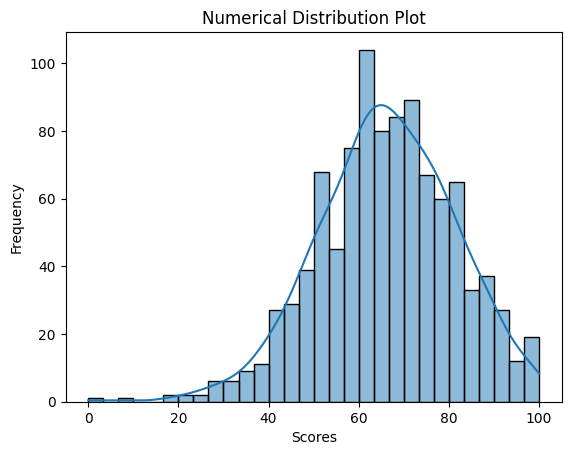

In [15]:
sns.histplot(df["math score"], kde=True, bins = 30)
plt.title("Numerical Distribution Plot")
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.show()


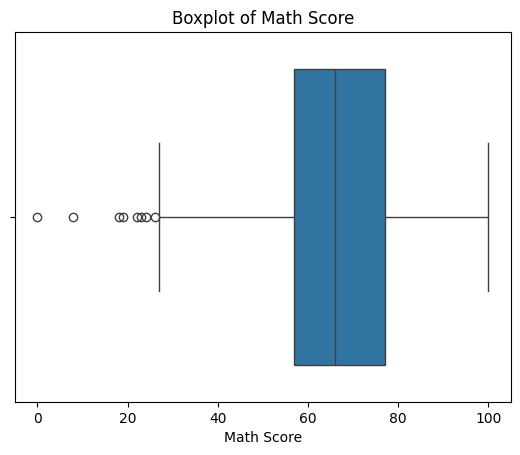

In [16]:
# use boxplot for detection
sns.boxplot(x=df["math score"])
plt.title("Boxplot of Math Score")
plt.xlabel("Math Score")
plt.show()

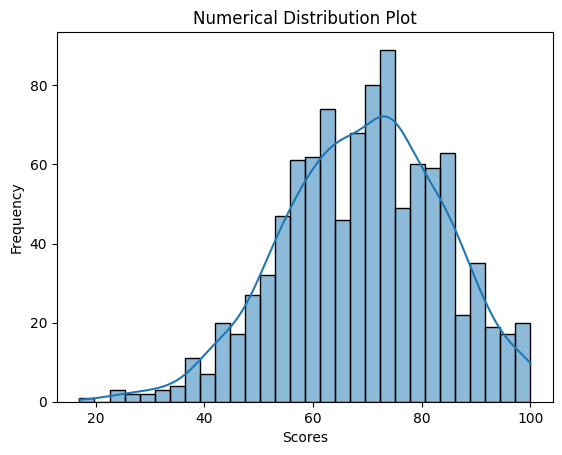

In [17]:
sns.histplot(df["reading score"], kde=True, bins = 30)
plt.title("Numerical Distribution Plot")
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.show()

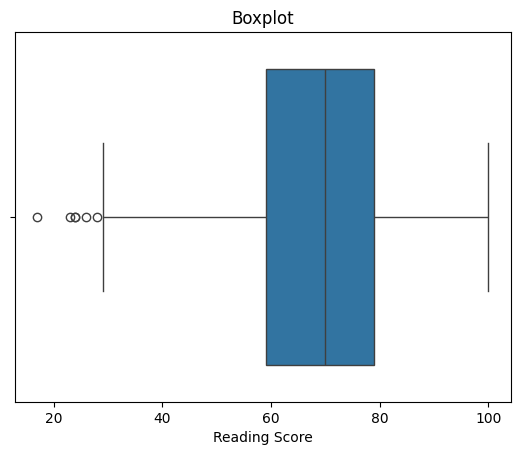

In [18]:
sns.boxplot(x=df["reading score"])
plt.title("Boxplot")
plt.xlabel("Reading Score")
plt.show()

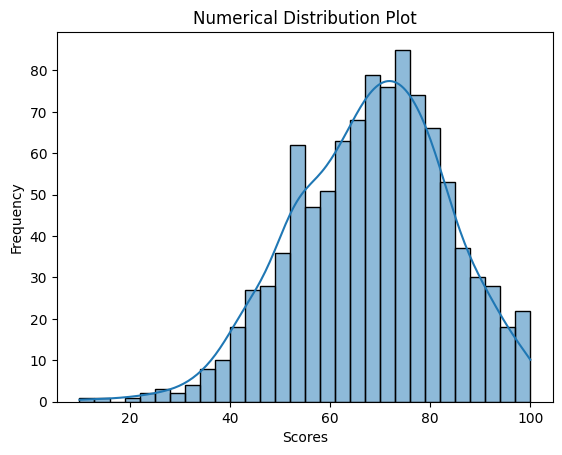

In [19]:
sns.histplot(df["writing score"], kde=True, bins = 30)
plt.title("Numerical Distribution Plot")
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.show()

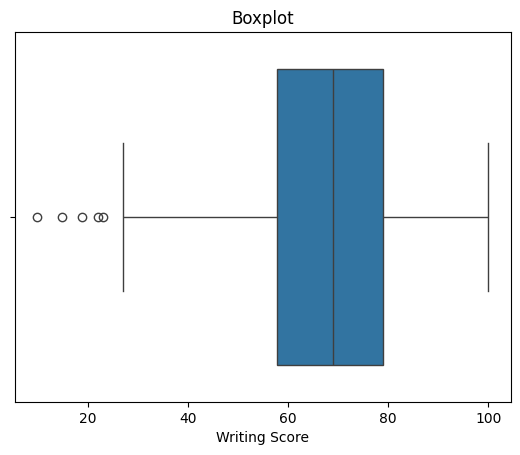

In [20]:
sns.boxplot(x=df["writing score"])
plt.title("Boxplot")
plt.xlabel("Writing Score")
plt.show()

In [21]:
# since the numeric columns are positively skewed, so use IQR for outliers removal
# using for loop
# numeric_cols = ["math score", "reading score", "writing score"]
# for i in numeric_cols:
#   Q1 = df[i].quantile(0.25)
#   Q3 = df[i].quantile(0.75)
#   IQR = Q3 -Q1

#   upper_bound = Q1 - 1.5 * IQR
#   lower_bound = Q3 + 1.5 * IQR


#   print(f'Q1 = {Q1}')
#   print(f'Q3 = {Q3}')
#   print(f'IQR = {IQR}')
#   print(f'Upper Bound Limit = {upper_bound}')
#   print(f'Lower Bound Limit = {lower_bound}')

In [22]:
# df = df[(df[i] >= lower_bound) & (df[i] <= upper_bound)]

In [23]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,72,72,74
1,female,group C,some college,standard,69,90,88
2,female,group B,master's degree,standard,90,95,93
3,male,group A,associate's degree,free/reduced,47,57,44
4,male,group C,some college,standard,76,78,75


In [25]:
# # take the numerical columns
from scipy import stats
num_cols = ["math score", "reading score", "writing score"]
z_scores = np.abs(stats.zscore(df[num_cols]))
df = df[(z_scores < 3).all(axis=1)]

In [26]:
df

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,72,72,74
1,female,group C,some college,standard,69,90,88
2,female,group B,master's degree,standard,90,95,93
3,male,group A,associate's degree,free/reduced,47,57,44
4,male,group C,some college,standard,76,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,88,99,95
996,male,group C,high school,free/reduced,62,55,55
997,female,group C,high school,free/reduced,59,71,65
998,female,group D,some college,standard,68,78,77


**Normalize or standardize numerical features**

In [27]:
from sklearn.preprocessing import StandardScaler



# initialize standard scaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [28]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,0.380705,0.178308,0.381755
1,female,group C,some college,standard,0.175990,1.447554,1.333370
2,female,group B,master's degree,standard,1.608994,1.800122,1.673233
3,male,group A,associate's degree,free/reduced,-1.325252,-0.879397,-1.657421
4,male,group C,some college,standard,0.653658,0.601390,0.449728


**6. EDA**

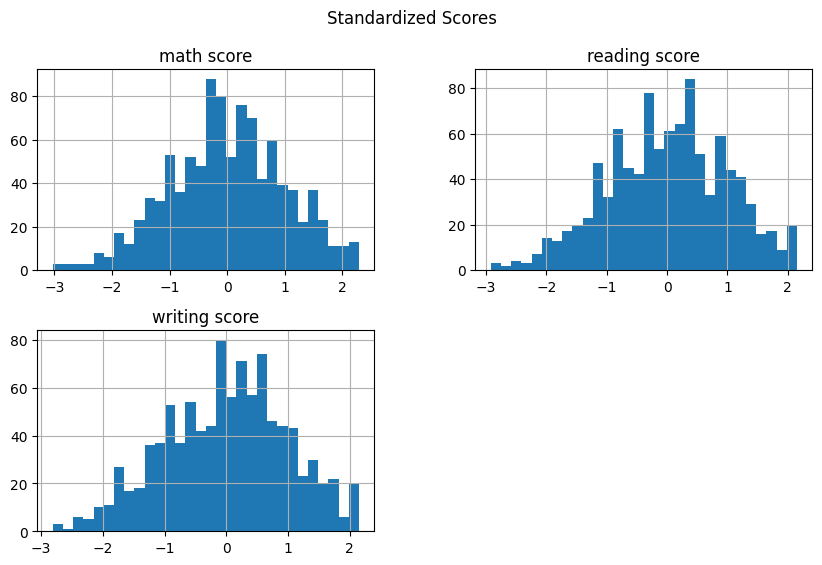

In [29]:
# Histograms
df[num_cols].hist(bins=30, figsize=(10, 6))
plt.suptitle("Standardized Scores")
plt.show()

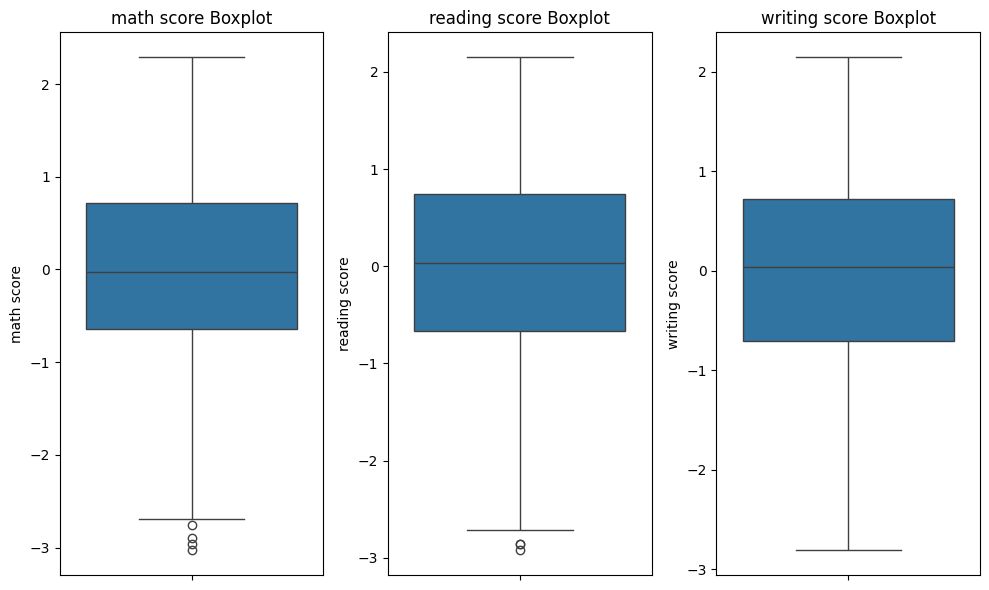

In [30]:
# Boxplot
plt.figure(figsize=(10, 6))
for i, col in enumerate(num_cols):
  plt.subplot(1, 3, i+1) # (rows, columns, position step(index))
  sns.boxplot(data= df, y=col)
  plt.title(f"{col} Boxplot")

plt.tight_layout()
plt.show()

In [31]:
z_scores_df = pd.DataFrame(z_scores, columns=num_cols)
print(z_scores_df.head())

   math score  reading score  writing score
0    0.390024       0.193999       0.391492
1    0.192076       1.427476       1.313269
2    1.577711       1.770109       1.642475
3    1.259543       0.833899       1.583744
4    0.653954       0.605158       0.457333


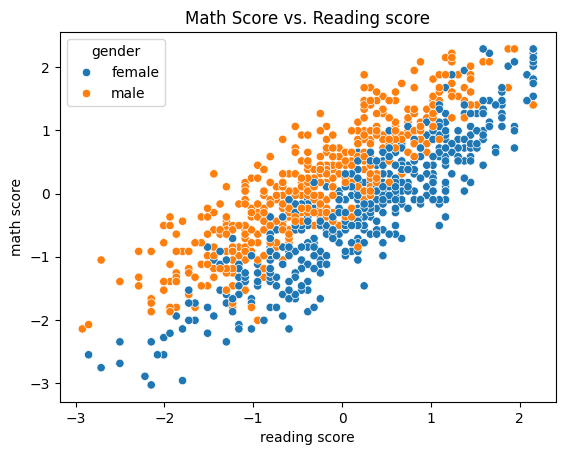

In [33]:
# scatter plot
sns.scatterplot(data=df, x="reading score", y="math score", hue="gender")
plt.title("Math Score vs. Reading score")
plt.show()

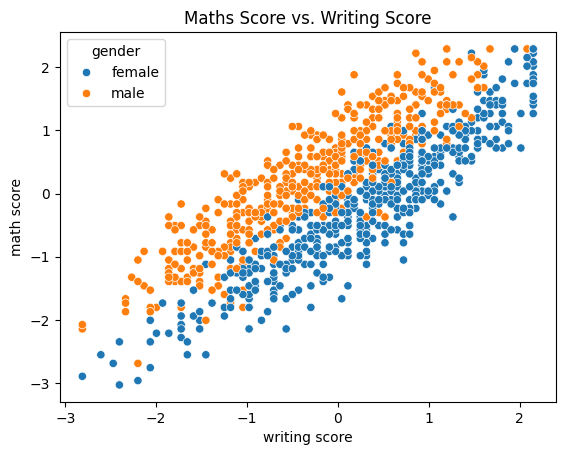

In [35]:
# math score vs. writing score
sns.scatterplot(data=df, x="writing score", y="math score", hue="gender")
plt.title("Maths Score vs. Writing Score")
plt.show()

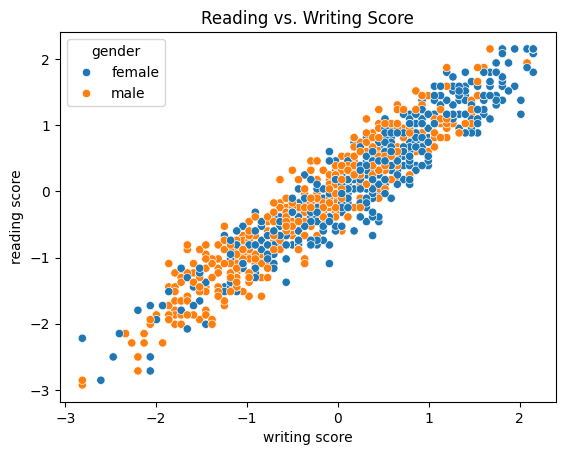

In [36]:
# reading vs. writing score
sns.scatterplot(data=df, x="writing score", y="reading score", hue="gender")
plt.title("Reading vs. Writing Score")
plt.show()

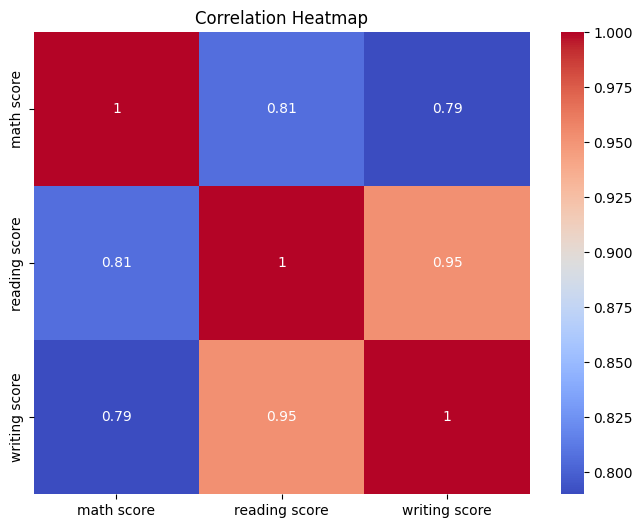

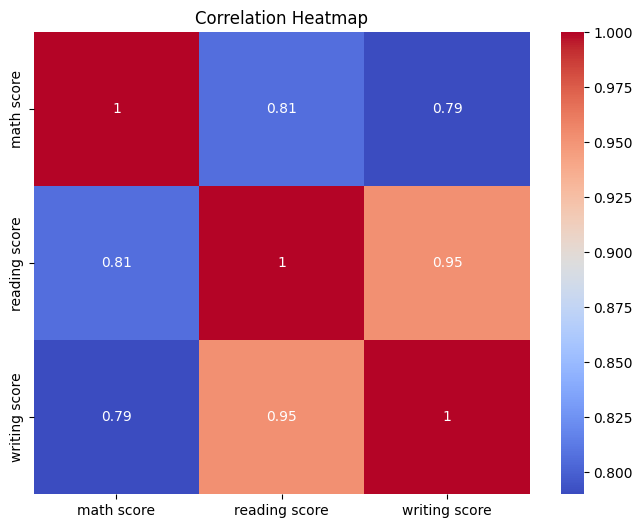

In [39]:
# Heatmap Correlation
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot= True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

**7. Statistics**

In [42]:
# Calculate the mean, median, std dev, min, max
df[num_cols].agg(["mean", "median", "std", "min", "max"])

,math score,reading score,writing score
mean,1.681546e-16,6.082189e-17,2.182432e-16
median,-2.872467e-02,3.728063e-02,4.189243e-02
std,1.000504e+00,1.000504e+00,1.000504e+00
min,-3.031209e+00,-2.924292e+00,-2.812953e+00
max,2.291377e+00,2.152690e+00,2.149041e+00


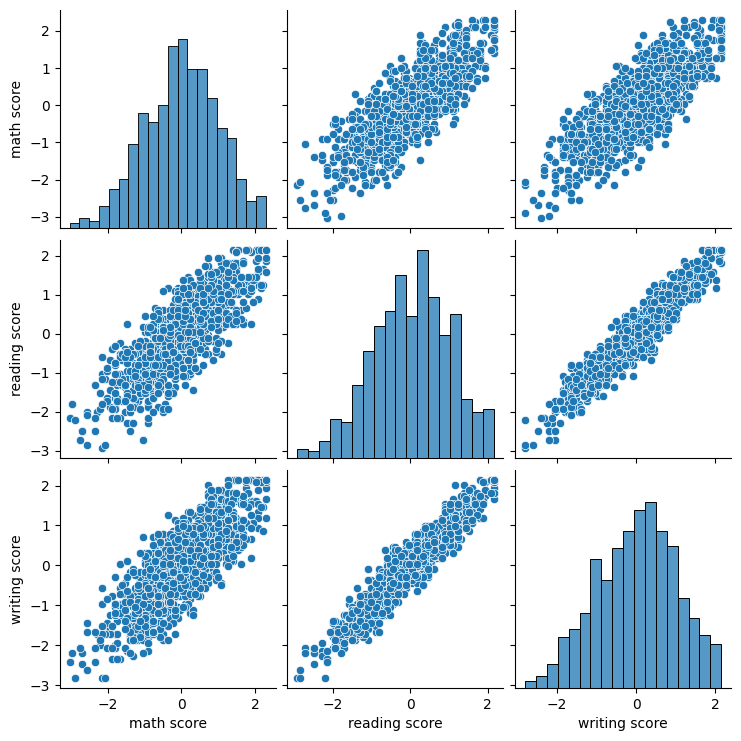

In [44]:
# Clusters
sns.pairplot(df[num_cols])
plt.show()

## **Relationships, Clusters, and Anomalies**

- We used scatterplots and correlation heatmaps to find relationships between scores.
- Pairplots helped us see natural clusters among student performance.
- Boxplots and Z-score methods helped detect and remove outliers.

**Interesting findings:**
- Strong positive correlation between reading and writing scores.
- Some students had unusually low math scores compared to other subjects.